# Introduction to Machine Learning

Last session we understood what an Exploratory Data Analysis is (EDA), and why do we perform it. Once the data is clean and ready for the model, the only step left is to train it. However, there is nuance to the process, and it is not as straightforward as it may seem.

## What is Machine Learning?

Machine Learning is the science behind computer algorithms that help machines learn from data without explicit programming.

![image](https://images.datacamp.com/image/upload/v1689699524/Comparing_different_industry_terms_9e8fa1a2ff.png)

### Types of ML

There are different types of Machine Learning algorithms depending on how your data looks and what is the objective of your algorithm. We can classify them in three different types:

- **Supervised learning**: what we want the model to predict, we give it to it during training. It will learn to predict those values by minimizing the error between its prediction and the actual value (ground truth).
Example: Spam filtering. We indicate to the algorithm which email messages are spam and which ones are not.
- **Unsupervised learning**: there is no specific value we want the model to predict. We give it the input data, and we ask of it to uncover hidden patterns and relationships that might be useful for us.
Example: Customer Segmentation in Marketing. We ask the model to create customer groups that might have similar needs. With that classification, companies are able to offer similar products to similar customers.
- **Reinforcement learning**: in this case, we have an agent that learns how to take actions in a specific environment to maximize a reward signal.
Example: robot navigating a maze. Each time the robots moves correctly, it receives a reward. If not, it receives a penalty. Slowly, it will learn what are the characteristics of the optimal path to get out of the maze.


## Data splitting

### Why?

As we already know, ML models learn from the data we show them. However, the objective of training a model is so that we can use it to predict correctly the output of some data it has never seen before. When the model is in production (its final stage, predicting for the client or whoever needs it), we can assess if it is performing correctly or not. But shouldn't we be able to assess that **before** it reaches that stage?

That is why we do not use all of our available data for training. We split it. We will show the model some of the data, and we will use the rest to see how it performs with data it has never seen before.

Data splitting is done to assess two different things:
- **Assess generalization**: we want to see how the model generalizes, how it performs with data it has never seen before, as we just said.
- **Prevent overfitting**: overfitting happens when the model performs very well with the data it has seen during the training, and not so good with the data is has not yet seen. This usually happens when the model is more complex than it needs to be. The model ends up **learning** all of the training data, but it is not capable of generalizing. To see if there is overfitting or not, we have to see how the model performs with data it has not seen.

![image](https://miro.medium.com/v2/resize:fit:1125/1*_7OPgojau8hkiPUiHoGK_w.png)



### How?

We need to make sure of two things:
- **The model sees enough data during training**. To ensure that the model is capable of learning what the true distribution of the data is, we have to show it a sample of data that represents faithfully the whole population.
- **We have enough data to see if it is capable of generalizing**. Just as with training, in the phase of testing we need another sample that would be representative enough of the population. In this case, is to avoid **high-variance** in the estimate of the model's performance.

We have to have enough samples in each split to ensure statistical significance.

So, how do we do the split?

We divide the data in three parts:
- **Training set**: the data the model sees during training, the data it learns from.
- **Validation set**: this is some data the model does not see during training, but we use it to tune the hyperparameters of the model between trainings, going from the architecture of the model itself to specific hyperparameters such as the learning rate, batch size, etc.
- **Test set**: we only use it once we consider all of our trainings are done. It is to provide an unbiased evaluation of the final model's performance on unseen data.

![image](https://www.brainstobytes.com/content/images/2020/01/Sets.png)

The percentages of data that go to each set depend on each project and how much total data you have. However, the most common splits are 60/20/20, 70/15/15 and 80/10/10.

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

# Check how many instances there is
print(f"There are {len(housing)} instances")

There are 20640 instances


The splitting can easily be done in code if your data has been loaded in a `pandas` DataFrame with `sklearn`.

In [2]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"There are {len(train_set)} instances in the training set, and {len(test_set)} in the test set")

There are 16512 instances in the training set, and 4128 in the test set


In [3]:
train_set, val_set = train_test_split(train_set, test_size=0.25, random_state=42)
print(f"There are {len(train_set)} instances in the training set, {len(val_set)} in the validation set, and {len(test_set)} in the test set")

There are 12384 instances in the training set, 4128 in the validation set, and 4128 in the test set


*Note: the Exploratory Data Analysis (EDA) is usually done only on the training set. All preprocessing done there is then repeated in the validation and test sets*.

## Choosing a model

The next step in the pipeline is to choose the model. To properly do this step, we have to do several things first:
- **Understand your data**: the EDA should be enough to complete this step. Once we have explored the data, we should be able to get a sense of what the relationships might be between the attributes of each sample and the value we want to predict. There are different types of data, and different models understand better different data types.
- **Define the problem clearly**: what are we doing? Regression? Classification? Clustering? The output of the model and how it comes to perdict using the input attributes shouls help us choose the right one.
- **Start simple**: if there are a bunch of models you can try with your data, start with the simplest ones first. The simpler the model, the easier it is to understand its decisions and the cheaper it is to train it.
- **Evaluate multiple models**: increase complexity and see how it affects the performance. You are not bound to your initial decision, try several.
- **Consider the context and constraints**: what do we want from the model? Speed? Accuracy? Interpretability? Choose accordingly.

## Training a model



Training, as we have already discussed, is the phase where we teach the model how to make better predictions by learning patters in the data. This is done by **adjusting internal parameters** so that the model gets better at matching the input data to the correct output.

**Loss function**. It is also called the objective function. In supervised learning, when the model predicts something, there will almost always be a difference between the prediction and the real value (label). How we define this difference is what we call the **loss function**. Depending on how we define it, the objective of the model will be to minimize it or maximize it. When we train the model, it is adjusting its internal parameters (also called weights) so that this function is minimized or maximized, depending on the objective.

![image](https://gbhat.com/assets/gifs/linear_regression.gif)


In [ ]:
# Setting aside the input data and the ground truth (usually called y)
y = train_set["median_house_value"]
train_set = train_set.drop("median_house_value", axis=1)

In [ ]:
# Steps done in the EDA

# Fill null values in total_bedrooms
median = train_set["total_bedrooms"].median()
train_set.fillna({"total_bedrooms": median}, inplace=True)

# Feature scaling for all numerical attributes
from sklearn.preprocessing import StandardScaler
numeric_features = train_set.drop("ocean_proximity", axis=1)
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(numeric_features)
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_features.columns, index=train_set.index)
scaled_train_set = pd.concat([scaled_numeric_df, train_set[["ocean_proximity"]]], axis=1)

# One-hot encode the ocean_proximity attribute
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
ocean_proximity_1hot = encoder.fit_transform(scaled_train_set[["ocean_proximity"]])
ocean_proximity_1hot = ocean_proximity_1hot.toarray()
encoded_feature_names = encoder.get_feature_names_out(["ocean_proximity"])
ocean_proximity_df = pd.DataFrame(ocean_proximity_1hot, columns=encoded_feature_names, index=train_set.index)
train_set = scaled_train_set.drop("ocean_proximity", axis=1)
train_set = pd.concat([train_set, ocean_proximity_df], axis=1)


In [ ]:
# Training of a linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
X = train_set
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
# Predictions on training set
predictions = lin_reg.predict(X)
predictions[:5].round(-2)

array([270000.,  97600.,  86300., 134600., 149800.])

In [ ]:
# Ground truth of training set
y.iloc[:5].values

array([335300.,  88500.,  78600.,  98700.,  90000.])

In [ ]:
y_val = val_set["median_house_value"]
val_set = val_set.drop("median_house_value", axis=1)

In [ ]:
# EDA done on the validation set
# Fill null values in total_bedrooms
median = train_set["total_bedrooms"].median()
val_set.fillna({"total_bedrooms": median}, inplace=True)

# Feature scaling for all numerical attributes
from sklearn.preprocessing import StandardScaler
numeric_features = val_set.drop("ocean_proximity", axis=1)
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(numeric_features)
scaled_numeric_df = pd.DataFrame(scaled_numeric, columns=numeric_features.columns, index=val_set.index)
scaled_val_set = pd.concat([scaled_numeric_df, val_set[["ocean_proximity"]]], axis=1)

# One-hot encode the ocean_proximity attribute
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
ocean_proximity_1hot = encoder.fit_transform(scaled_val_set[["ocean_proximity"]])
ocean_proximity_1hot = ocean_proximity_1hot.toarray()
encoded_feature_names = encoder.get_feature_names_out(["ocean_proximity"])
ocean_proximity_df = pd.DataFrame(ocean_proximity_1hot, columns=encoded_feature_names, index=val_set.index)
val_set = scaled_val_set.drop("ocean_proximity", axis=1)
val_set = pd.concat([val_set, ocean_proximity_df], axis=1)

In [ ]:
X_val = val_set

In [ ]:
lin_reg.predict(X_val)[:5].round(-2)

array([114700.,  93900., 156400.,  57100., 260000.])

In [ ]:
y_val.iloc[:5].values

array([ 80800.,  41000., 133000.,  54400., 184100.])

## Evaluating the performance

There are a lot of ways of evaluating the performance of the model. The first, and most obvious, is to look at how the loss function is evolving.

![image](https://developers.google.com/static/machine-learning/crash-course/images/metric-curve-ex01.svg)

Depending on the type of problem we deal with, we will also want to see other metrics. Here are the most common ones for supervised learning.

### Regression metrics

They usually measure the difference or similarity between the outputs of the model and the ground truth.

- **MSE**: Mean Squared Error.
- **R²**: used to assess how good is the fit of a regression to the data.






In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)
print(mse)
print(r2)

4734952853.820829
0.6388467848176831


In [ ]:
# Validation metrics

mse_val = mean_squared_error(y_val, lin_reg.predict(X_val))
r2_val = r2_score(y_val, lin_reg.predict(X_val))
print(mse_val)
print(r2_val)

4563969618.537382
0.658672237343735


### Classification metrics

We will do a little test with the Iris dataset to see how all of the above is performed in a Classification scenario, instead of a Regression one.

For that, we will use the Iris dataset, that has some data about sepal and petal widths and lengths and their respective type of iris (setosa, versicolour and virginica).

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

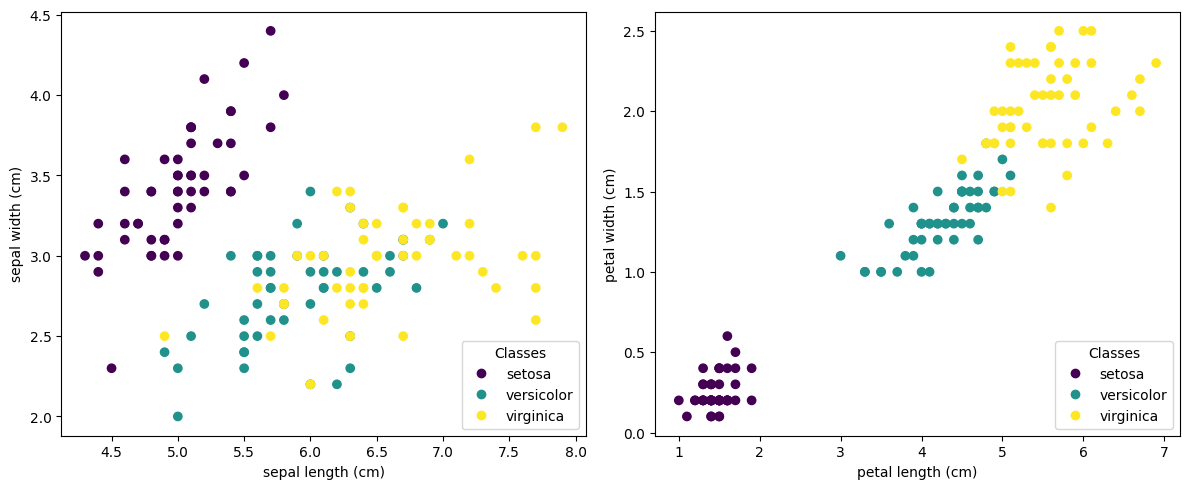

In [23]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# First subplot
scatter1 = axs[0].scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
axs[0].set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
axs[0].legend(
    scatter1.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

# Second subplot
scatter2 = axs[1].scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
axs[1].set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
axs[1].legend(
    scatter2.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

plt.tight_layout()
plt.show()


As we can see in the plots above, it seems pretty easy to separate the setosa iris from the other two, given both the sepal and petal lengths. However, the other two seem more prone to be confused.

In [34]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Let's just train a simple tree classifier and see how it performs with the appropriate metrics.

In [35]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

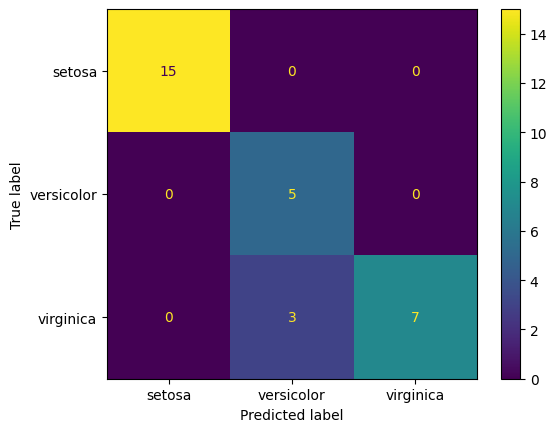

In [36]:
predictions = tree_clf.predict(X_test)

# See confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_mat = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=iris.target_names)
disp.plot()

Here we have the confusion matrix. It is a useful representation of how well the model performed for the test set, but we can extract some other metrics from it directly.

![image](https://miro.medium.com/v2/resize:fit:842/1*LVilqC3cy4AgyC1wD4RH-A.png)

In the image above, we can see those metrics. Depending on the objective of our project, we will give more importance to a specific one.

In [37]:
accuracy = (predictions == y_test).mean()
print(f"Accuracy: {accuracy}")

Accuracy: 0.9


In [40]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, predictions, average="macro")
print(f"Precision: {precision}")

Precision: 0.875


In [41]:
recall = recall_score(y_test, predictions, average="macro")
print(f"Recall: {recall}")

Recall: 0.9


## Cross validation

![image](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

Instead of having a fix validation set, we have now several. We divide the training data in K folds, and we perform K trainings, leaving one of the folds (a different one each time) as the validation set. This is useful when we have a small amount of data, and want to get a better approximation of the evaluation of the model. In the cross-validation, we consider the validation metrics the mean of the K trainings.

Again, `sklearn` has a function to perform a cross validation. We have to give it the model (estimator that has the .fit() function we have seen), and the inputs and ground truth of the model. [Here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) is the documentation for it.



In [ ]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(lin_reg, X, y, cv=5, scoring="r2")
cv_results

{'fit_time': array([0.14398074, 0.18559051, 0.01573753, 0.01153469, 0.01538706]),
 'score_time': array([0.00387287, 0.0039289 , 0.00293589, 0.00349665, 0.00532532]),
 'test_score': array([0.65739396, 0.64172021, 0.6423294 , 0.62858359, 0.61064097])}

## Improving the performance of the model

The last thing to do before going to testing is improving the hyperparameters of the model. That means, the parameters we use on training. To do that, there are several techniques of Search. Here, we use the **validation set** to compare the different results and the different models.

### Grid Search

Grid Search is a brute-force approach to hyperparameter tuning. It works by exhaustively searching through a manually specified subset of the hyperparameter space. For example, if we want to try different values for learning rate, number of layers, and batch size, we define all the values we want to test for each parameter, and Grid Search evaluates every possible combination. While this method guarantees finding the best combination within the specified grid, it can be very computationally expensive, especially when the number of parameters or the range of values increases.

[Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to documentation.

In [ ]:
# Example extracted directly form sklearn documentation
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

### Random Search

Random Search addresses the inefficiency of Grid Search by randomly sampling combinations of hyperparameters from specified distributions. Instead of trying every possible combination, it selects a fixed number of random combinations to evaluate. Surprisingly, Random Search often performs just as well as Grid Search and is much more efficient when only a few hyperparameters significantly influence performance. It's a good baseline method, especially when computational resources are limited.

[Link](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) to documentation.

![image](https://substackcdn.com/image/fetch/f_auto,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F1bf0f3af-22ce-46b1-a0a5-d34ee4544514_772x441.png)




In [ ]:
# Example extracted from documentation
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
iris = load_iris()
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,
                              random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                     penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(iris.data, iris.target)

### Bayesian Optimization

Bayesian Optimization is a more advanced technique that models the performance of the model as a probabilistic function of the hyperparameters. Instead of blindly searching the space, it uses past results to choose the next set of parameters to evaluate, aiming to find the optimum with fewer evaluations. It builds a surrogate model (like a Gaussian Process) to predict performance and selects new points to evaluate based on a strategy like Expected Improvement. This approach is more efficient than both Grid and Random Search, particularly when training is expensive or the search space is large.

`sklearn` does not have the Bayesian Optimization. However, there is an extension to the library, called `scikit-optimize`, that does. Check it out [here](https://scikit-optimize.github.io/stable/).

## Testing

After you have done all of the above, and you believe there is nothing more you can do before the deadline and putting the model in production, that is when you perform the testing phase.

This phase only consists on using the model to do the predictions on the **test set**, and using the metrics we used during training to see how well the model performed on data it has never seen before.

These results are what is presented to the client, they are our way of defending that the model works good enough.